In [2]:
import json
import requests
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sts
import csv

In [3]:
url_people = "http://swapi.dev/api/people/" 
people_response = requests.get(url_people).json()

url_starships = "http://swapi.dev/api/starships/"
starships_response = requests.get(url_starships).json()

In [4]:
character_list = []
page = ["1", "2", "3", "4", "5", "6", "7", "8"]
url_name_list = f"{url_people}?page="

print ("Character Names:")

for x in page:
    people_response_next = requests.get(url_name_list + x).json()
   
    for people in people_response_next["results"]:
        character_name = people["name"]
        character_list.append(character_name)
        print(character_name)

Character Names:
Luke Skywalker
C-3PO
R2-D2
Darth Vader
Leia Organa
Owen Lars
Beru Whitesun lars
R5-D4
Biggs Darklighter
Obi-Wan Kenobi
Anakin Skywalker
Wilhuff Tarkin
Chewbacca
Han Solo
Greedo
Jabba Desilijic Tiure
Wedge Antilles
Jek Tono Porkins
Yoda
Palpatine
Boba Fett
IG-88
Bossk
Lando Calrissian
Lobot
Ackbar
Mon Mothma
Arvel Crynyd
Wicket Systri Warrick
Nien Nunb
Qui-Gon Jinn
Nute Gunray
Finis Valorum
Padmé Amidala
Jar Jar Binks
Roos Tarpals
Rugor Nass
Ric Olié
Watto
Sebulba
Quarsh Panaka
Shmi Skywalker
Darth Maul
Bib Fortuna
Ayla Secura
Ratts Tyerel
Dud Bolt
Gasgano
Ben Quadinaros
Mace Windu
Ki-Adi-Mundi
Kit Fisto
Eeth Koth
Adi Gallia
Saesee Tiin
Yarael Poof
Plo Koon
Mas Amedda
Gregar Typho
Cordé
Cliegg Lars
Poggle the Lesser
Luminara Unduli
Barriss Offee
Dormé
Dooku
Bail Prestor Organa
Jango Fett
Zam Wesell
Dexter Jettster
Lama Su
Taun We
Jocasta Nu
R4-P17
Wat Tambor
San Hill
Shaak Ti
Grievous
Tarfful
Raymus Antilles


In [5]:
url_people_search = url_people + "?search="

search_characters = character_list

mass = []
starwars_characters = []

for character in search_characters:
    character_query = url_people_search + character
    response = requests.get(character_query)
    response_json = response.json()

    try:
        starwars_characters.append(character)
        mass.append(response_json['results'][0]['mass'])
        print (f"{character}'s stats have been entered.")

    except: 
            print(f"{character} not found")
            pass

Luke Skywalker's stats have been entered.
C-3PO's stats have been entered.
R2-D2's stats have been entered.
Darth Vader's stats have been entered.
Leia Organa's stats have been entered.
Owen Lars's stats have been entered.
Beru Whitesun lars's stats have been entered.
R5-D4's stats have been entered.
Biggs Darklighter's stats have been entered.
Obi-Wan Kenobi's stats have been entered.
Anakin Skywalker's stats have been entered.
Wilhuff Tarkin's stats have been entered.
Chewbacca's stats have been entered.
Han Solo's stats have been entered.
Greedo's stats have been entered.
Jabba Desilijic Tiure's stats have been entered.
Wedge Antilles's stats have been entered.
Jek Tono Porkins's stats have been entered.
Yoda's stats have been entered.
Palpatine's stats have been entered.
Boba Fett's stats have been entered.
IG-88's stats have been entered.
Bossk's stats have been entered.
Lando Calrissian's stats have been entered.
Lobot's stats have been entered.
Ackbar's stats have been entered.


In [6]:
Character_Stat_dict = {"Character Name": starwars_characters, "Mass (kg)": mass}
character_stat_df = pd.DataFrame(Character_Stat_dict)

In [7]:
Clean_Character_stat_df = character_stat_df.drop(character_stat_df[character_stat_df["Mass (kg)"] == "unknown"].index) 

Clean_Character_stat_df

,Character Name,Mass (kg)
0,Luke Skywalker,77
1,C-3PO,75
2,R2-D2,32
3,Darth Vader,136
4,Leia Organa,49
5,Owen Lars,120
6,Beru Whitesun lars,75
7,R5-D4,32
8,Biggs Darklighter,84
9,Obi-Wan Kenobi,77


In [8]:
#mass 
mass_df = Clean_Character_stat_df.sort_values("Mass (kg)", ascending = True)
print(mass_df)

Character Name Mass (kg)
15  Jabba Desilijic Tiure     1,358
69        Dexter Jettster       102
17       Jek Tono Porkins       110
12              Chewbacca       112
22                  Bossk       113
5               Owen Lars       120
3             Darth Vader       136
78                Tarfful       136
21                  IG-88       140
45           Ratts Tyerel        15
77               Grievous       159
18                   Yoda        17
28  Wicket Systri Warrick        20
7                   R5-D4        32
2                   R2-D2        32
39                Sebulba        40
46               Dud Bolt        45
33          Padmé Amidala        45
74             Wat Tambor        48
4             Leia Organa        49
53             Adi Gallia        50
63          Barriss Offee        50
44            Ayla Secura        55
68             Zam Wesell        55
62        Luminara Unduli      56.2
76               Shaak Ti        57
48         Ben Quadinaros        65
34 

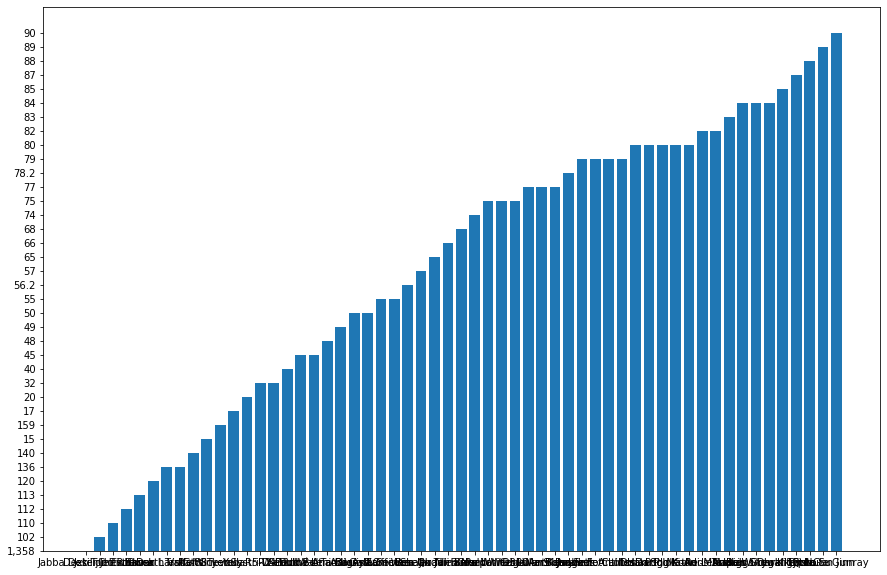

In [11]:
tick_locations = [value for value in Clean_Character_stat_df["Character Name"]]
labels = Clean_Character_stat_df["Character Name"]
plt.figure(figsize = (15, 10))
plt.bar(mass_df["Character Name"], mass_df["Mass (kg)"])
plt.show()